# ORIE 5355/INFO 5370 HW 4: Experimentation

 - Name: **Ariana Rosario**
 - Net-id: **ar943**
 - Date: **10/31/2023**
 - Late days used for this assignment: **1**
 - Total late days used (counting this assignment): **4**
 - People with whom you discussed this assignment: **n/a**

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/bksANDh9kJitim2j9 and include the survey completion code below.

### Question 0 [1 points]
<font color='green'> Survey completion code: <font color='black'> **hw4_2021dfg**

# Conceptual component [4 points]

### Personal reflection

<font color='green'> Think back to a time that you wanted to evaluate an idea or product. If you have not had such an idea before, you may answer these questions about an article in the news that reported such a feature, or a feature that you think might be in deployment at a company or organization with which you interact (for example, Amazon, Google, Facebook, etc). 

<font color='green'> Briefly summarize the scenario in no more than two sentences. 

In a previous role, I was overseeing the soft launch of an internal product that was essentially a company version of Wikipedia. During this soft launch, we wanted to evaluate the **efficiency of different marketing methods in tool adoption** *(i.e. how many people have started using the product)*

Using Google analytics, I had access to *metrics such as site visits, active users, and session time*. In theory, an uptick in these measurements could indicate an increase in tool adoption.

<font color='green'> What was the objective that you cared about/wanted to optimize with the product/idea? What was the measurement that you could feasibly measure during the experimental period? In what ways did the measurement not match the objective you cared about? Answer in no more than 3 sentences.  

I wanted to evaluate different marketing methods and optimize for higher user adoption. However, "adoption" cannot be directly measured, so I used metrics such as site visits, active users, and session time as proxies.

While the proxy metrics were helpful in giving me a better idea of site traffic, they could be affected by scenarios other than higher tool usage. For instance, there could be many site visits from a single user or that lasted for too short of a time to be considered "active".

<font color='green'> Did the setting have interference (such as due to a network setting, interference through a 2 sided marketplace or capacity constraints, etc.)? If so, how did it effect your experimental design and results? If your answer is no, why are you sure that such interference did not happen? Answer in no more than 3 sentences.  

To begin, the experiment couldn't necessarily prove a causal relationship between a given marketing method and an uptick in active users, all we could see is correlation. 

Additionally, given that the product involved networks (both in the user base and content) there was definitely interference. 
* For instance, when we tried a marketing technique with a given team, the information could be passed down through the team's network and lead to an uptick in active users, depending on the size and connectivity of the team

* Also, the product was a wiki, so the content were articles that linked to other articles. This means that the more we socialized the product, the more articles and links, which could lead to more site visits

<font color='green'> Given what we have learned in class so far, what would you do differently if faced with the same scenario again? Answer in no more than 3 sentences. 

Given that one of the sources of interference due the network effect in the users, I could try to **track the "source" of new users** *(similar to attribution in digital marketing).*

Another thing to consider could be the method of **increasing the unit of experimentation** *(discussed in class)* and analyze the effect of two different treatments over two similar but fairly isolated teams.

# Programming component

## Helper code

In [394]:
import numpy as np
import pandas as pd
import os, sys, math
import matplotlib.pyplot as plt

In [395]:
df_headlines = pd.read_csv('headline-experiment-heds.csv')
df = pd.read_csv('headline-experiment-impressions.csv')

In [396]:
for x in df_headlines.hed:
    print(x)

She's Not Just Destined For Greatness, She's Destined To Do Great Things For Women
This Young Woman Just Took Silicon Valley By Storm And She's Not Stopping There
Feminism 101: This Girl Is Going Places And She's Taking Other Girls With Her 
Remember When Math Was "Too Hard" For The Ladies? Not So Much.


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14950 entries, 0 to 14949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hed     14950 non-null  int64
 1   click   14950 non-null  int64
dtypes: int64(2)
memory usage: 233.7 KB


In [398]:
df.hed.value_counts()

hed
3    3763
1    3756
4    3737
2    3694
Name: count, dtype: int64

In [399]:
df.groupby('hed')['click'].mean()

hed
1    0.010650
2    0.006497
3    0.010098
4    0.004549
Name: click, dtype: float64

df_headlines has a list of 4 headlines for the same article from Upworthy. df is a dataframe where each row represents a user. `hed` indicates which headline was shown to the user, and `click` is a binary indicator for whether the user clicked on the headline. A `1` represents a click, and so, for example, headline 2 was clicked on 0.6\% of the time. Each headline was shown to about 3700 users.

I recommend reading the following post: https://towardsdatascience.com/ab-testing-with-python-e5964dd66143 (the corresponding jupyter noteebok can be found at https://github.com/renatofillinich/ab_test_guide_in_python)

In this homework, we will only be working with the first two headlines:

In [400]:
df = df.query('hed==1 or hed==2')

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7450 entries, 1 to 14949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hed     7450 non-null   int64
 1   click   7450 non-null   int64
dtypes: int64(2)
memory usage: 174.6 KB


# Problem 1: Simple A/B tests, and dependence on sample size

## Problem 1a: Simple A/B testing (2 pts)

First, what do the results look like if we use all the data?

Here, you will want to use the functions under "4. Testing the hypothesis" in the above blog post. In particular you will want to test the "1 sided" hypothesis that headline 1 is better than headline 2. (In statsmodels.stats.proportion.proportions_ztest, use alternative='larger', and put headline 1 first in the data.)

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html


<font color='green'> If you use all the data (all the entries in the dataframe), what is the mean click through rate for each headline?

In [402]:
df_test = df.copy()

# converting hed to categorical
df_test['hed'] = df_test['hed'].astype('category')
df_test.describe(include='all')

,hed,click
count,7450.0,7450.000000
unique,2.0,NaN
top,1.0,NaN
freq,3756.0,NaN
mean,NaN,0.008591
std,NaN,0.092293
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


In [403]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# getting metrics for each headline
df_test_results = df_test.groupby('hed')['click'].agg(['sum', 'count', 'mean']).reset_index()
df_test_results.columns = ['headline', 'clicks', 'impressions', 'Click Fraction']
df_test_results['Click Fraction'] = df_test_results['Click Fraction']
df_test_results

,headline,clicks,impressions,Click Fraction
0,1,40,3756,0.010650
1,2,24,3694,0.006497


The mean click through rates are:
* H1 = ~1.07% 
* H2 = ~0.65%

<font color='green'> If you use all the data, what is the p-value for the hypothesis that the first headline is better than the second headline?

In [404]:
# calculating p-val for hypothesis that H1 is better than H2

import statsmodels
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint

hed_1_success, hed_2_success = df_test_results['clicks']
hed_1_nobs, hed_2_nobs = df_test_results['impressions']

# z-test
stat, pval = proportions_ztest(df_test_results['clicks'], df_test_results['impressions'], alternative='larger')
print(f'Given the hypothesis: H1 better than H2, the p-val is {round(pval, 4)}')

Given the hypothesis: H1 better than H2, the p-val is 0.0261


<font color='green'> If you use all the data, what are the 95% confidence intervals for the click through rates for each headline?

For example, we got Headline 1: (0.0074, 0.0139)

In [405]:
# calculating confidence intervals

hed_1_confint = proportion_confint(hed_1_success, hed_1_nobs, alpha=0.05)
hed_2_confint = proportion_confint(hed_2_success, hed_2_nobs, alpha=0.05)
hed_1_confint = [round(x, 4) for x in hed_1_confint]
hed_2_confint = [round(x, 4) for x in hed_2_confint]

print(f'Confidence interval for H1: {hed_1_confint}')
print(f'Confidence interval for H2: {hed_2_confint}')

Confidence interval for H1: [0.0074, 0.0139]
Confidence interval for H2: [0.0039, 0.0091]


In [406]:
# checking confidence intervals for different confidence levels

def calc_confint(n_success, nobs, pct = 95):
    alpha = 1 - (pct/100)
    confint = proportion_confint(n_success, nobs, alpha=alpha)
    confint = [round(x, 4) for x in confint]
    return confint

for conf in [95, 90, 85, 80, 75, 70]:
    col_name = str(conf) + 'confint'
    df_test_results[col_name] = df_test_results.apply(lambda x: calc_confint(x['clicks'], x['impressions'],pct=conf), axis=1)

df_test_results

,headline,clicks,impressions,Click Fraction,95confint,90confint,85confint,80confint,75confint,70confint
0,1,40,3756,0.010650,"[0.0074, 0.0139]","[0.0079, 0.0134]","[0.0082, 0.0131]","[0.0085, 0.0128]","[0.0087, 0.0126]","[0.0089, 0.0124]"
1,2,24,3694,0.006497,"[0.0039, 0.0091]","[0.0043, 0.0087]","[0.0046, 0.0084]","[0.0048, 0.0082]","[0.005, 0.008]","[0.0051, 0.0079]"


<font color='green'> Interpret the above, in no more than 3 sentences

Looking at the 95% confidence interval, we can see that **the values for H1 are generally higher than the values for H2** *(although there's a little bit of overlap, meaning that there are scenarios where H2>H1)*.

However, looking at other confidence levels, we see that at 80% confidence, there's **no longer an overlap** between the intervals for H1 and H2 *(meaning that even the highest H2 would still be lower than the lowest possible H2)*.

All in all, between the raw click-thru rate comparisons, p-value check, and confidence interval analysis, we can say that H1 is better than H2.

## Problem 1b: Experimentation with lower sample sizes (2 pts)

Now, we'll see how often we would make the "wrong" decision if we instead had run an experiment with a lower sample size. We do this via a method called "bootstrapping" -- we 're-sample' from the data that we actually saw, in order to estimate what would have happened via counter-factual experiments.  

<font color='green'> Complete the following function, which does the following: it simulates 1000 fake experiments; each fake experiment, we sample `overall_sample_size` users and pretend that those users made up the experiment. 
    
<font color='green'> We want to store:
    
- the distribution of click-through-rate estimates for each headline (we do this for you)

- the fraction of experiments in which headline 1 was found to be better than headline 2

Here, we're going to say the experiment found that headline 1 was better than headline 2 if it had a higher click fraction, even if it wasn't statistically significant (regardless of p value).

In [407]:
def get_estimates_from_bootstrapping(df, overall_sample_size = 100):
    estimates = {hed: [] for hed in df.hed.unique()} # for each headline, store the mean estimates
    number_of_headlines_1_better_than_2 = 0
    for _ in range(1000): # simulate 1000 fake experiments ("bootstrapping")
        df_sample = df.sample(overall_sample_size)
        means = df_sample.groupby('hed')['click'].mean()
        for en, mean in enumerate(means):
            estimates[en+1].append(mean)

        ### TODO complete code here for number_of_headlines_1_better_than_2

        # check if headline 1 is better than headline 2
        if means[1] > means[2]:
            number_of_headlines_1_better_than_2 += 1
    
    return estimates, number_of_headlines_1_better_than_2/1000
    

In [408]:
# testing above function

est, perc_1_better_2 = get_estimates_from_bootstrapping(df)
print(f'After running 1000 experiments with sample size=100, H1 is better than H2 {round(perc_1_better_2*100, 2)}% of the time.')

After running 1000 experiments with sample size=100, H1 is better than H2 34.4% of the time.


<font color='green'> For each of overall_sample_size in [100, 1000, 5000] plot a histogram of the estimates for each headline. You should have 3 plots, each plot corresponding to 1 sample size number and containing 2 histograms, 1 for each headline.




In [409]:
import math

samples = [100, 1000, 5000]
percs = {}
ests = {}
bin_max = {}

for sample in samples:
    est, perc_1_better_2 = get_estimates_from_bootstrapping(df, overall_sample_size=sample)
    percs[sample] = perc_1_better_2
    ests[sample] = est
    
    max_est = max(np.max(ests[sample][1]), np.max(ests[sample][2]))
    bin_max[sample] = round(math.ceil(max_est*1000)/1000,3) # rounding up to 3 decimal places

In [410]:
# plotting a histogram of estimates and percentages for sample = 100

def add_bar_labels(freq, bins, patches, half_bin, color):
    for freq, bin, path in zip(freq, bins, patches):
        bin_center = bin + half_bin
        height = int(freq)
        lbl = str(height)
        if height<1: height = 1
        
        plt.text(bin_center, height, lbl, ha='center', va='bottom', color=color, fontsize=8)

def generate_two_histograms(sample, ests, bin_max):
    bins = np.linspace(0, bin_max[sample], 20)
    half_bin = (bins[1]-bins[0])/2

    h1_freq, h1_bins, h1_patches = plt.hist(ests[sample][1], bins = bins, log=True, 
                                            alpha=0.35, label='H1', rwidth =1, color='blue')
    add_bar_labels(h1_freq, h1_bins, h1_patches, half_bin, 'blue')
    h2_freq, h2_bins, h2_patches = plt.hist(ests[sample][2], bins = bins, log=True, 
                                            alpha=0.3, label='H2', rwidth =1, color='red')
    add_bar_labels(h2_freq, h2_bins, h2_patches, half_bin, 'red')

    # setting y-axis limit to next power of 10
    max_freq = max(h1_freq.max(), h2_freq.max())
    if max_freq>1000:
        y_lim = 10000
    elif max_freq>100:
        y_lim = 1000
    else:
        y_lim = 100

    plt.ylim(0, y_lim)
    plt.xlabel('Click Fraction')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Click Fractions for H1 and H2 using {sample} samples')
    plt.show()    

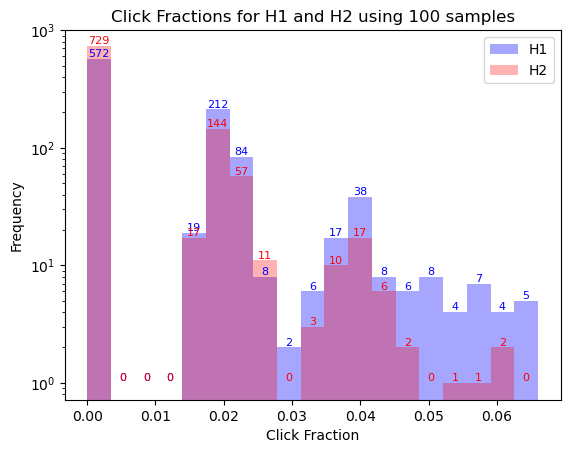

In [411]:
# plotting a histogram of click fraction estimates with 100 samples
generate_two_histograms(100, ests, bin_max)

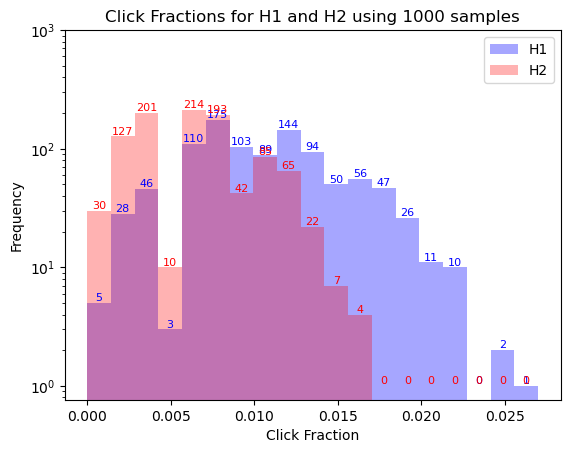

In [412]:
# plotting a histogram of click fraction estimates with 1000 samples
generate_two_histograms(1000, ests, bin_max)

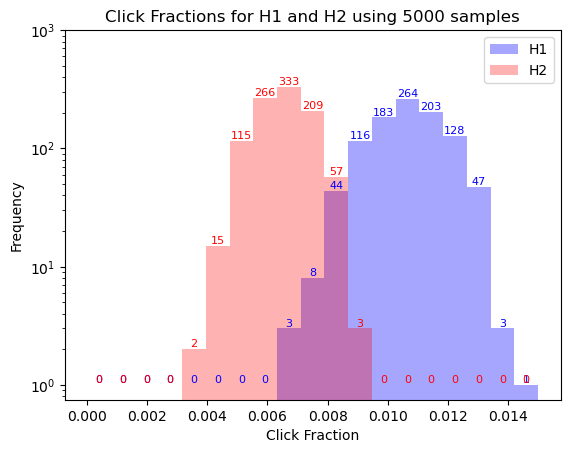

In [413]:
# plotting a histogram of click fraction estimates with 5000 samples
generate_two_histograms(5000, ests, bin_max)

<font color='green'> For each of overall_sample_size in sample_size_numbers, get the fraction of experiments in which headline 1 was found to be better than headline 2. Plot a line plot where the X axis is the sample size, and the Y axis is the fraction of times. Note that this code might take a minute or so to run. Note: your line plot should be increasing in the sample size (Why?)

For example, with 100 samples, we got: ~0.36. For 1100 samples, we got  0.788. 


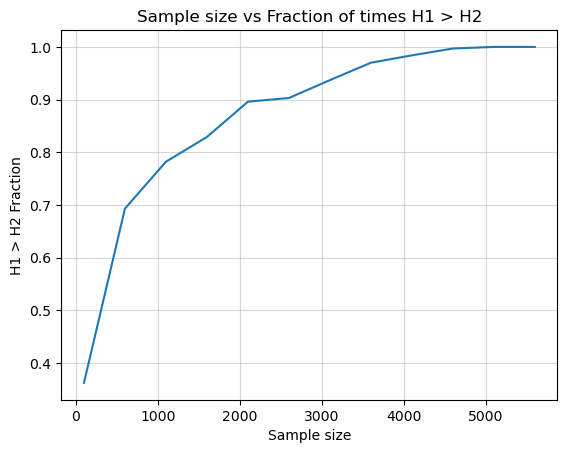

In [414]:
sample_size_numbers = list(range(100, 6000, 500))
percs = {}

for sample_size in sample_size_numbers:
    est, perc_1_better_2 = get_estimates_from_bootstrapping(df, overall_sample_size=sample_size)
    #print(f'After running 1000 experiments with sample size {sample_size}, headline 1 is better than headline 2 {round(perc_1_better_2*100, 2)}% of the time.')
    percs[sample_size]=perc_1_better_2

# plot sample size vs percentage of times headline 1 is better than headline 2
plt.plot(percs.keys(), percs.values())
plt.xlabel('Sample size')
plt.ylabel('H1 > H2 Fraction')
plt.title('Sample size vs Fraction of times H1 > H2')
# showing grid lines with smaller intervals
plt.grid(which='both', alpha=0.5)
plt.show()

<font color='green'> Intepret the above, in no more than 3 sentences.

We know from $1a$ that H1 had a considerably higher click fraction (almost 2X) than H2. However, this is not the case when calculating click fractions using a sample of 100 points. 

This is because the **click fractions are such a small portion of the total impressions** (e.g. 24 clicks out of 3694 impressions), that a smaller sample size could be missing a considerable amount of clicks for either headline. 

Basically, *there are many ways to sample the data that will not show accurate results.* We see in the graph above *("Sample size vs Fraction of times H1 > H2")* that anything under ~500 samples shows the wrong result *(that H2 is better than H1)*.

## Problem 2: Peeking (4 points)

Now, we'll illustrate the problem of "peeking" in experiments. Suppose you're a headline writer, and you personally wrote headline 2 and are now running the AB test. So, you have a maximum experiment budget of 2000 users. Each user comes in sequentially and is assigned either the first or second headline. Now, you also realize that experimentation is wasteful, and so you want to minimize the amount of time you're spending in the experiment.

So, you do the following: after each 20th user comes in and either clicks on the headline or doesn't, you check if headline 2 has a higher click fraction than headline 1. If it does, you declare victory and stop the experiment. Otherwise, you continue. 

Now, we'll want to calculate: how often does the above procedure lead to you declaring victory, that headline 2 is better than headline 1?

Here, we will walk you through simulating the above procedure. As before, we will simulate 1000 fake experiments, to get a good estimate of what the above procedure behaves like.  

<font color='green'> Finish the below code, to calculate number_of_headlines_2_better_than_1 using the above procedure

In [415]:
# creating helper function

def get_estimates_with_peeking(df, sample_size=2000, peek_every=20, n_experiments= 1000, check_pval=False):

    number_of_headlines_2_better_than_1 = 0

    print(f'Running {n_experiments} experiments...')
    print(f'* Sample size = {sample_size}, peeking every {peek_every} users')
    if(check_pval):
        s = 'YES'
    else:
        s = 'NO'
    print(f'* Checking p-value: {s}')
    print(f'* Progress:')

    for i in range(n_experiments): # simulate n fake experiments
        
        # printing progress
        i += 1
        steps = 10
        if(i%(n_experiments/steps)==0): 
            progress = int(i*100/n_experiments)
            print(f'\t{progress}%')

        df_sample = df.sample(sample_size)

        for number_users in range(peek_every, sample_size+1, peek_every):
            df_users_to_far = df_sample.iloc[0:number_users] #grab the first number_users users

            # Note, you sometimes may get "unlucky", and all the first 20 users received the same headline. In that case, continue the experiment without checking the p-value

            # checking if sample df has both headlines
            if len(df_users_to_far.hed.unique())<2:
                continue # skipping to next iteration
            
            #TODO: calculate click fractions for each headline
            df_results_so_far = df_users_to_far.groupby('hed')['click'].agg(['sum', 'count', 'mean']).reset_index()
            df_results_so_far.columns = ['headline', 'clicks', 'impressions', 'Click Fraction']
            df_results_so_far['Click Fraction'] = df_results_so_far['Click Fraction'] 

            h1_fraction = df_results_so_far[df_results_so_far['headline']==1]['Click Fraction'].values[0]
            h2_fraction = df_results_so_far[df_results_so_far['headline']==2]['Click Fraction'].values[0]

            #TODO potentially end experiment. The "break" keyword in python might come in handy.
            # Note that you want to break the inner for loop but not the outer loop (think why). 
            if h2_fraction > h1_fraction:

                if check_pval:

                    # calculating p-value for hypothesis that H2>H1
                    stat, pval = proportions_ztest(df_results_so_far['clicks'], df_results_so_far['impressions'], alternative='smaller')
                    
                    if pval<=0.05:
                        number_of_headlines_2_better_than_1 += 1
                        break
                else:
                    number_of_headlines_2_better_than_1 += 1
                    break
    
    h2_better = number_of_headlines_2_better_than_1/n_experiments
    print(f'DONE: H2 is better than H1 {round(h2_better*100,1)}% of the time')

    return h2_better            

In [416]:
# testing above function with 100 experiments without checking p-values

n_exp = 100
h2_better_no_pval= get_estimates_with_peeking(df,n_experiments=n_exp)

Running 100 experiments...
* Sample size = 2000, peeking every 20 users
* Checking p-value: NO
* Progress:


	10%
	20%
	30%
	40%
	50%
	60%
	70%
	80%
	90%
	100%
DONE: H2 is better than H1 68.0% of the time


In [417]:
# running 1000 experiments without checking p-values

n_exp = 1000
h2_better_no_pval = get_estimates_with_peeking(df,n_experiments=n_exp)

Running 1000 experiments...
* Sample size = 2000, peeking every 20 users
* Checking p-value: NO
* Progress:


	10%
	20%
	30%
	40%
	50%
	60%
	70%
	80%
	90%
	100%
DONE: H2 is better than H1 63.9% of the time


<font color='green'> What fraction of the time does the above procedure declare that headline 2 is better than headline 1?

In [418]:
print(f'H2 is better than H1 ~{round(h2_better_no_pval*100)}% of the time')

H2 is better than H1 ~64% of the time


<font color='green'> Interpret the above answer, in no more than 3 sentences. What went wrong?

Again, we know from $1a$ that H1>H2 in terms of click fraction. However, the above set of experiments had ***H2 beating H1 the majority of the time.*** 

This could be because the *experiments were stopped early* (as soon as H2>H1) **without checking whether the difference was statistically significant** or just due to chance.

Note: In practice, peeking involves not just taking the mean click percentage but also calculating a p-value and only exiting the experiment if the desired direction is statistically significantly better than the other one. Similar results occur in that setting.

In [419]:
# running 1000 experiments without checking p-values

n_exp = 1000
h2_better_with_pval = get_estimates_with_peeking(df,n_experiments=n_exp, check_pval=True)

Running 1000 experiments...
* Sample size = 2000, peeking every 20 users
* Checking p-value: YES
* Progress:


	10%
	20%
	30%
	40%
	50%
	60%
	70%
	80%
	90%
	100%
DONE: H2 is better than H1 6.8% of the time


After re-running the experiments but **including a p-value check** to rule out results due to chance, we see a *steep decrease* in the number of times H2>H1. 

Meaning in the initial experiments, *many of the "wins" were not statistically significant* and led to wildly inaccurate results.